# PRCP-1002-Handwritten Digits Recognition

## PROJECT TEAM ID : PTID-CDS-FEB-23-1465

### DOMAIN ANALYSIS

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

Task3:- Compare between various models and find the classifier that works better.


__Problem Statement :__ <br>

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

 -  Computer vision fundamentals including simple neural networks
 -  Classification methods such as SVM and K-nearest neighbors


In [1]:
## Basic Libraies ::

import numpy as np, pandas as pd 
import matplotlib.pyplot as plt, seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
## Tensorflow Libraries:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

## For importing the MNIST dataset:
from keras.datasets import mnist

## For prediction evaluation:
from sklearn.metrics import *

_Load the dataset and splitting into train data and test data_

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

_The shape of the dataset_

In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

#### Data Exploration
 Defining a function to visualize the images for train and test set

In [5]:
def plot_images_sample(X, Y):
    plt.figure(figsize=(22,4))
    rand_indicies = np.random.randint(len(X), size=20) # returns 20 random indexes 
    for i in range(20):
        plt.subplot(2,10,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        index = rand_indicies[i]
        plt.imshow(np.squeeze(X[index]), cmap="binary")
        plt.title(Y[index])
    plt.show()

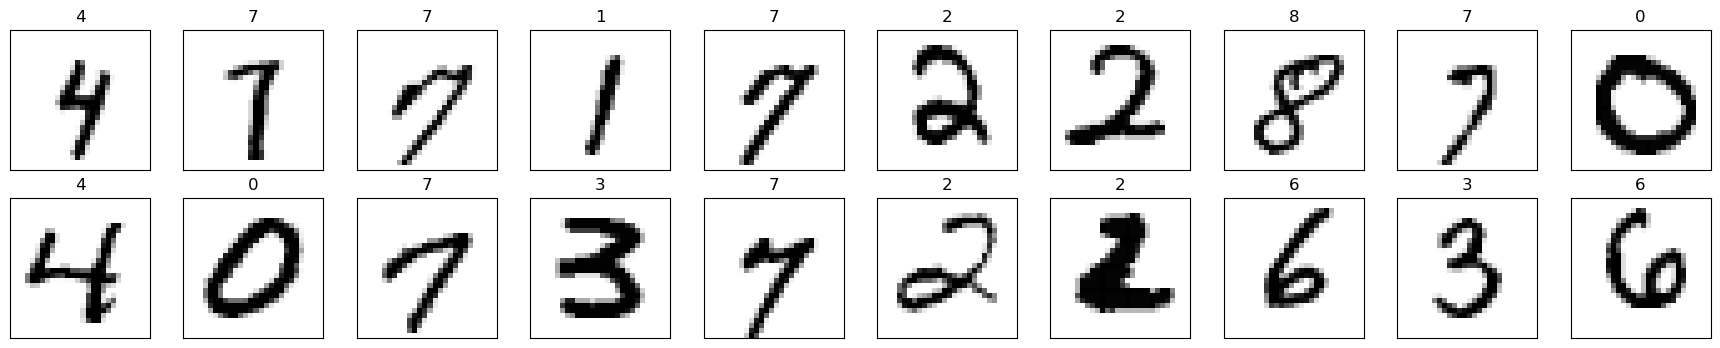

In [6]:
# Function for train:
plot_images_sample(X_train, y_train)

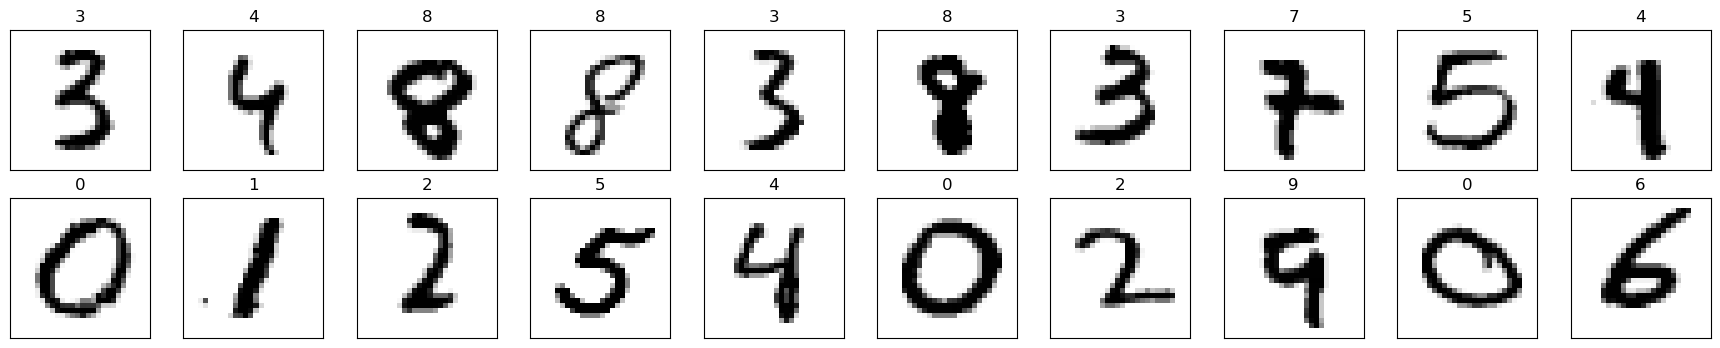

In [7]:
# Function for test:
plot_images_sample(X_test, y_test)

## 1). CNN

In [8]:
# importing Libraries for CNN

from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical # For one hot encoding the target labels
from keras import callbacks
from keras.callbacks import ModelCheckpoint # Saving the best model

In [9]:
## Separating the train and test data for cnn purpose
X_train_cnn = X_train.copy()
X_test_cnn = X_test.copy()
y_train_cnn = y_train.copy()
y_test_cnn = y_test.copy()

- Expanding the dimension:<br>

(batch size, height, width, channels)<br>
Use of np.expand_dims() is to add a channel dimension to the input tensor. When using grayscale images, the input data only has one channel, but a CNN expects data with multiple channels.<br> 
np.expand_dims() can be used to add a channel dimension to the input data, so that it can be used as input for the CNN.
</p>

In [10]:
X_train_cnn = np.expand_dims(X_train_cnn, axis = -1)
X_test_cnn = np.expand_dims(X_test_cnn, axis = -1)

_Scaling the features for both train and test_

In [11]:
X_train_cnn = X_train_cnn.astype('float32') / 255
X_test_cnn = X_test_cnn.astype('float32') / 255

_One Hot Encoding the target labels_

In [12]:
no_of_classes = len(np.unique(y_train)) # total number of classes are there in the target

y_train_cnn = to_categorical(y_train_cnn, no_of_classes)
y_test_cnn = to_categorical(y_test_cnn, no_of_classes)

In [13]:
## After encoding we can see the shape which has with 10 columns(10 labels)
y_train_cnn.shape, y_test_cnn.shape

((60000, 10), (10000, 10))

#### Model creation:

In [14]:
sequ = Sequential()

In [15]:
# Convolution + Relu layer:
sequ.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "same", activation = "relu", input_shape = X_train_cnn.shape[1:]))
# Maxpool layer:
sequ.add(MaxPooling2D(pool_size = 2))

# Convolution + Relu layer:
sequ.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "same", activation = "relu"))
# Maxpool layer:
sequ.add(MaxPooling2D(pool_size = 2))

# Dropout layer:
sequ.add(Dropout(0.3))

# Flattening the inputs:
sequ.add(Flatten())

# Adding Hidden layer:
sequ.add(Dense(128, activation = "relu")) # "relu" used in hidden layer

# Dropout layer:
sequ.add(Dropout(0.4))

# Adding output layer:
sequ.add(Dense(no_of_classes, activation = "softmax")) # "softmax" used in output and since it is a multi class classification

In [16]:
sequ.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [17]:
sequ.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [18]:
# Save the best model with minimum loss & higher accuracy:
check_point = ModelCheckpoint(filepath = "model.weights.best.hdf5", verbose = 3, save_best_only = True)

In [19]:
history = sequ.fit(X_train_cnn, y_train_cnn, batch_size = 32, epochs = 10, validation_split = 0.2, callbacks = [check_point], verbose = 3, shuffle = True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.06406, saving model to model.weights.best.hdf5
Epoch 2/10

Epoch 2: val_loss improved from 0.06406 to 0.04631, saving model to model.weights.best.hdf5
Epoch 3/10

Epoch 3: val_loss did not improve from 0.04631
Epoch 4/10

Epoch 4: val_loss improved from 0.04631 to 0.03452, saving model to model.weights.best.hdf5
Epoch 5/10

Epoch 5: val_loss did not improve from 0.03452
Epoch 6/10

Epoch 6: val_loss improved from 0.03452 to 0.03388, saving model to model.weights.best.hdf5
Epoch 7/10

Epoch 7: val_loss improved from 0.03388 to 0.03243, saving model to model.weights.best.hdf5
Epoch 8/10

Epoch 8: val_loss did not improve from 0.03243
Epoch 9/10

Epoch 9: val_loss did not improve from 0.03243
Epoch 10/10

Epoch 10: val_loss did not improve from 0.03243


In [20]:
y_pred = sequ.predict(X_test_cnn)

313/313 [==============================] - 3s 8ms/step


In [21]:
# Accuracy for test data
score = sequ.evaluate(X_test_cnn, y_test_cnn, verbose = 0)
print(score[1] * 100)

99.1100013256073


In [22]:
y_pred_index = y_pred.argmax(axis = 1)

In [23]:
print(y_pred_index)
print(y_test_cnn.argmax(axis = 1))

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [24]:
# Accuracy
print(accuracy_score(y_test_cnn.argmax(axis = 1), y_pred_index))

0.9911


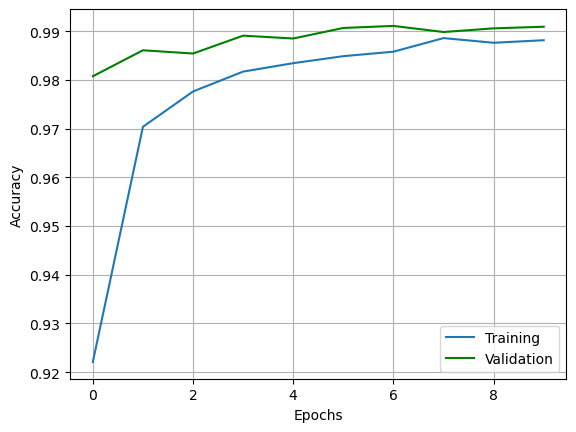

In [25]:
# Accuracy curve
plt.plot(history.history["accuracy"], label = "Training")
plt.plot(history.history["val_accuracy"], label = "Validation", color = "g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "best")
plt.grid()
plt.show()

*Plotting the actual and predicted labels with thw help of visualization*

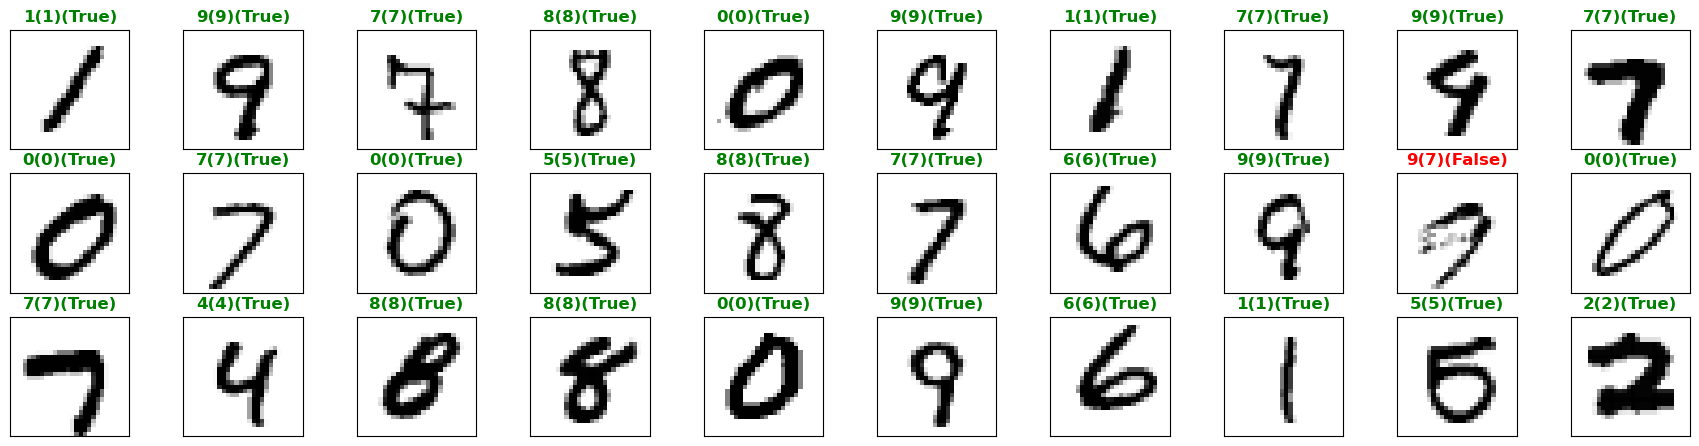

CPU times: total: 2.48 s
Wall time: 2.5 s


In [26]:
%%time

y_test_max = y_test_cnn.argmax(axis = 1)

plt.figure(figsize=(22,9))
rand_indicies = np.random.randint(len(X_test_cnn), size=50)
for i in range(30):
  y_pred_index = y_pred[rand_indicies[i]].argmax()
  plt.subplot(5,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.squeeze(X_test_cnn[rand_indicies[i]]), cmap="binary")
  plt.title(f"{y_test_max[rand_indicies[i]]}({y_pred_index}){'(True)' if y_test_max[rand_indicies[i]] == y_pred_index else '(False)'}", color = 'g' if y_test_max[rand_indicies[i]] == y_pred_index else "r", fontweight="bold")
plt.show()

## 2). KNN

In [27]:
# importing Libraries for KNN:
from sklearn.neighbors import KNeighborsClassifier

*Reshaping the input*

In [28]:
# Separating the train and test data for knn purpose
x_train_knn = X_train.copy()
x_test_knn = X_test.copy()
y_train_knn = y_train.copy()
y_test_knn = y_test.copy()

In [29]:
x_train_knn = np.reshape(x_train_knn,(60000,784))
x_test_knn = np.reshape(x_test_knn,(10000,784))

In [30]:
print(x_train_knn.shape, y_train_knn.shape)
print(x_test_knn.shape, y_test_knn.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


*Scaling the data*

In [31]:
x_train_knn = x_train_knn.astype('float32') / 255
x_test_knn = x_test_knn.astype('float32') / 255


Taking optimal k to determine how many nearest neighbors  to create<br>
create a list to store the error values for each k


In [32]:
error =  []

for k in range(3, 20):
    model  = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_knn, y_train_knn)
    predictions = model.predict(x_test_knn)
    e  = 1 - accuracy_score(y_test_knn, predictions)
    error.append(e)

In [33]:
print(error)

[0.02949999999999997, 0.03180000000000005, 0.031200000000000006, 0.032299999999999995, 0.03059999999999996, 0.03300000000000003, 0.03410000000000002, 0.033499999999999974, 0.03320000000000001, 0.03390000000000004, 0.03469999999999995, 0.03600000000000003, 0.036699999999999955, 0.036800000000000055, 0.03700000000000003, 0.036699999999999955, 0.036800000000000055]


_Plot the k-value and error rate_

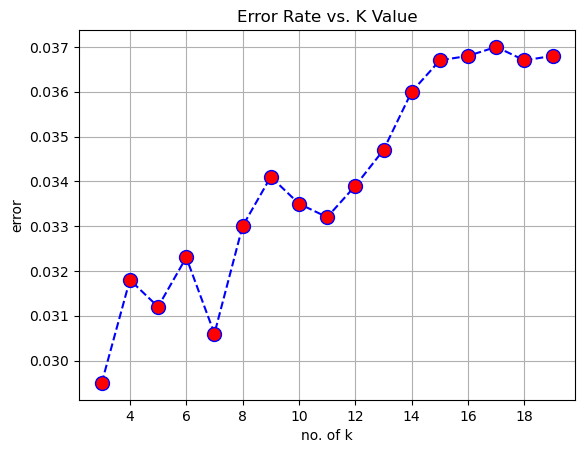

In [34]:
plt.plot(range(3, 20) ,  error,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel("no. of k")
plt.ylabel("error")
plt.grid()
plt.show()

#### Model Creation:

In [35]:
# Make the data fit into KNN model and know how it performs:

model_knn  = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model_knn.fit(x_train_knn,y_train_knn)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [36]:
# prediction of the model

prediction_train = model_knn.predict(x_train_knn)
prediction_test  =  model_knn.predict(x_test_knn)

In [37]:
# Accuracy

print('accuracy_score for training data:',accuracy_score(y_train_knn, prediction_train)*100)

print('\naccuracy_score for test data:\t',accuracy_score(y_test_knn, prediction_test)*100)

accuracy_score for training data: 98.67166666666667

accuracy_score for test data:	 97.05


## 3). SVM

In [38]:
# importing Libraries for SVM:
from sklearn.svm import SVC

In [39]:
# Spliting the train and test data for SVM purpose
X_train_svm = X_train.copy()
X_test_svm = X_test.copy()
y_train_svm = y_train.copy()
y_test_svm = y_test.copy()

In [40]:
# reshape to be [samples][width][height][channels]
X_train_svm = X_train_svm.reshape((X_train_svm.shape[0], 28 * 28))
X_test_svm = X_test_svm.reshape((X_test_svm.shape[0], 28 * 28))

In [41]:
# convert data type and normalize values
X_train_svm = X_train_svm.astype('float32')
X_test_svm = X_test_svm.astype('float32')
X_train_svm /= 255
X_test_svm /= 255

In [42]:
# initializing the model
clf_svm = SVC()

In [43]:
#fitting the model with training data
clf_svm.fit(X_train_svm, y_train_svm)

SVC()

In [44]:
# predictions on the testing set
y_predict_train = clf_svm.predict(X_train_svm)
y_predict_test = clf_svm.predict(X_test_svm)

In [45]:
# Accuracy

print("Accuracy train:",accuracy_score(y_train_svm, y_predict_train))
print("Accuracy test:",accuracy_score(y_test_svm, y_predict_test))

Accuracy train: 0.9899166666666667
Accuracy test: 0.9792


## 4). RandomForest

In [46]:
# importing Libraries for RandomForest:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Spliting the train and test data for random forest purpose
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()

_Converting X_train_rf and X_test_rf to pandas dataframe_

In [48]:
X_train_rf = pd.DataFrame(X_train_rf.reshape(60000, 784), columns=['pixel_' + str(i) for i in range(X_train_rf.shape[1] * X_train_rf.shape[2])])
X_test_rf = pd.DataFrame(X_test_rf.reshape(10000, 784), columns=['pixel_' + str(i) for i in range(X_test_rf.shape[1] * X_test_rf.shape[2])])

_Converting y_train_rf and y_test_rf to pandas series_

In [49]:
y_train_rf = pd.Series(y_train_rf)
y_test_rf = pd.Series(y_test_rf)

In [50]:
X_train_rf.sample(2)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
58329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_test_rf.sample(2)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
2944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Model Creation:

In [52]:
rfc = RandomForestClassifier(n_estimators = 300, max_depth = 20, criterion = "gini", min_samples_split = 2, n_jobs = -1)

In [53]:
rfc.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=20, n_estimators=300, n_jobs=-1)

In [54]:
y_hat_rf = rfc.predict(X_test_rf)

In [55]:
# Accuracy of Training and Testing Scores:

print(f"Train score: {rfc.score(X_train_rf, y_train_rf)}")
print(f"Test score: {rfc.score(X_test_rf, y_test_rf)}")

Train score: 0.99935
Test score: 0.97


## 5). MLPClassifier

In [56]:
# importing Libraries for MLPClassifier:
from sklearn.neural_network import MLPClassifier

In [57]:
mlp = MLPClassifier()

mlp.fit(X_train_rf, y_train_rf)

MLPClassifier()

In [58]:
y_hat_mlp = mlp.predict(X_test_rf)

In [59]:
# Accuracy of Training and Testing Scores:

print(f"Train score: {mlp.score(X_train_rf, y_train_rf)}")
print(f"Test score: {mlp.score(X_test_rf, y_test_rf)}")

Train score: 0.9886333333333334
Test score: 0.961


## Creating accuracy performance of following algorithms in a DataFrame:

In [60]:
performance_df = pd.DataFrame()

In [63]:
performance_df["Algorithms"] = ["CNN", "KNN", "SVM", "RandomForestClassifier", "MLPClassifier", ]
performance_df["Accuracy"] = [0.9911, 0.9705, 0.9792, 0.97, 0.961]

# Conclusion

In [64]:
# Accuracy in descending order(higest accuracy):
performance_df.sort_values(by = "Accuracy",ascending=False)

,Algorithms,Accuracy
0,CNN,0.9911
2,SVM,0.9792
1,KNN,0.9705
3,RandomForestClassifier,0.9700
4,MLPClassifier,0.9610


__Applying the following algorithms:__
- "CNN"
- "KNN"
- "SVM"
- "RandomForestClassifier"
- "MLPClassifier"

<br>Concluded by choosing __*CNN (Convolution Neural Network)*__, as it is giving higher accuracy of __*0.9911*__.